In [1]:
BiP = 'AGGTCGACGCCGGCCAAGACAGCACAGACAGATTGACCTATTGGGGTGTTTCGCGAGTGTGAGAGGGAAGCGCCGCGGCCTGTATTTCTAGACCTGCCCTTCGCCTGGTTCGTGGCGCCTTGTGACCCCGGGCCCCTGCCGCCTGCAAGTCGGAAATTGCGCTGTGCTCCTGTGCTACGGCCTGTGGCTGGACTGCCTGCTGCTGCCCAACTGGCTGGCA'
vAug23_Gen5334_3548 = 'GCCCTACCAGTGAGGTATTATGTCCTATTCCAAAACTCCAGTCCGTCAGTGTATCTAGAACTCGGACGGCTTCGATCTATCGTTGTCCTATTTCCTCTCCTTGACCTCTTAGAGCGCAGTCCAGAGCACAGGTTTCGAGCAGGCGTTTCGCAAAAGGTCGGTCGGTACCCAGGGCAACCATGCTTCAAACAGTAGG'

BiP IRES (220nt):
序列: AGGTCGACGCCGGCCAAGACAGCACAGACAGATTGACCTATTGGGGTGTTTCGCGAGTGTGAGAGGGAAGCGCCGCGGCCTGTATTTCTAGACCTGCCCTTCGCCTGGTTCGTGGCGCCTTGTGACCCCGGGCCCCTGCCGCCTGCAAGTCGGAAATTGCGCTGTGCTCCTGTGCTACGGCCTGTGGCTGGACTGCCTGCTGCTGCCCAACTGGCTGGCA
结构: ........((((((((...((((((((.(((.....((....))((((((((.(..........).))))))))((((.(((......))).)).)).....((((((...((.((.....)).)).)))))).((.(((((..((((........))))(((((((......)).)))))..))))).)).))).))).)))))......)))))))).
最小自由能: -82.19999694824219 kcal/mol

Generated Sequence (196nt):
序列: GCCCTACCAGTGAGGTATTATGTCCTATTCCAAAACTCCAGTCCGTCAGTGTATCTAGAACTCGGACGGCTTCGATCTATCGTTGTCCTATTTCCTCTCCTTGACCTCTTAGAGCGCAGTCCAGAGCACAGGTTTCGAGCAGGCGTTTCGCAAAAGGTCGGTCGGTACCCAGGGCAACCATGCTTCAAACAGTAGG
结构: ..(((((...((((((((..((((((..............(((((..(((.........))))))))(((..(((....)))..))).......((((..(((..(((...)))..)))...))))....(((.((((.(.(((.(((....))).)))).)))).))).))))))...))))))))....)))))
最小自由能: -51.79999923706055 kcal/mol

结构距离分析:
碱基对距离: 122
字符串差异数: 108

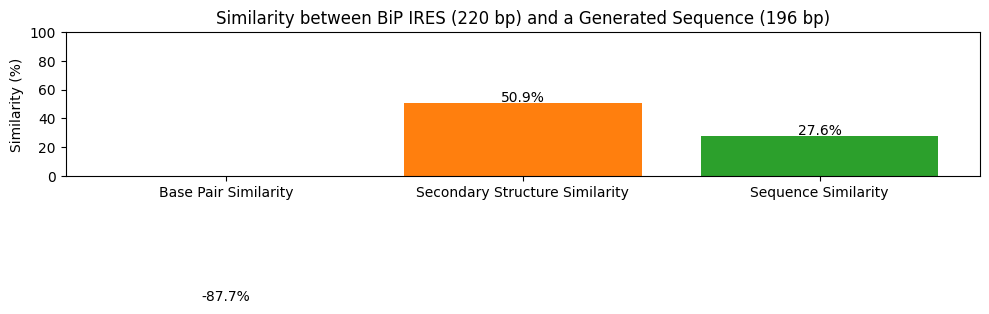

In [12]:
import RNA
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

def compare_rna_structures(seq1, seq2, seq1_name="Sequence 1", seq2_name="Sequence 2"):
    """
    比较两个RNA序列的结构相似性
    使用Vienna RNA包中的RNAdistance功能
    """
    # 预测两个序列的二级结构
    (ss1, mfe1) = RNA.fold(seq1)
    (ss2, mfe2) = RNA.fold(seq2)
    
    print(f"{seq1_name} ({len(seq1)}nt):")
    print(f"序列: {seq1}")
    print(f"结构: {ss1}")
    print(f"最小自由能: {mfe1} kcal/mol\n")
    
    print(f"{seq2_name} ({len(seq2)}nt):")
    print(f"序列: {seq2}")
    print(f"结构: {ss2}")
    print(f"最小自由能: {mfe2} kcal/mol\n")
    
    # 计算结构距离
    # 使用RNA.bp_distance来计算碱基对距离
    bp_dist = RNA.bp_distance(ss1, ss2)
    
    # 使用字符串编辑距离作为替代
    string_dist = sum(1 for a, b in zip(ss1, ss2) if a != b)
    
    print(f"结构距离分析:")
    print(f"碱基对距离: {bp_dist}")
    print(f"字符串差异数: {string_dist}")
    
    # 计算相似度百分比
    max_bp_dist = max(ss1.count('('), ss2.count('('))
    if max_bp_dist > 0:
        bp_similarity = (1 - (bp_dist / max_bp_dist)) * 100
    else:
        bp_similarity = 100 if bp_dist == 0 else 0
        
    string_similarity = (1 - (string_dist / max(len(ss1), len(ss2)))) * 100
    
    print(f"结构相似度:")
    print(f"碱基对相似度: {bp_similarity:.2f}%")
    print(f"结构字符串相似度: {string_similarity:.2f}%")
    
    # 序列相似度计算
    seq_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:seq_len], seq2[:seq_len]))
    seq_similarity = (matches / seq_len) * 100
    print(f"序列相似度: {seq_similarity:.2f}%")
    
    # 可以尝试使用外部命令调用RNAdistance
    try:
        import subprocess
        
        # 将结构写入临时文件
        with open("temp_struct1.txt", "w") as f:
            f.write(f"> {seq1_name}\n{ss1}\n")
        with open("temp_struct2.txt", "w") as f:
            f.write(f"> {seq2_name}\n{ss2}\n")
            
        # 调用RNAdistance命令行工具
        cmd = "RNAdistance -Df temp_struct1.txt temp_struct2.txt"
        try:
            result = subprocess.check_output(cmd, shell=True, text=True)
            print("\nRNAdistance命令行结果:")
            print(result)
        except:
            print("\nRNAdistance命令行调用失败，请确保已安装Vienna RNA Package并添加到PATH")
    except:
        print("\n跳过RNAdistance命令行调用")
    
    return {
        "bp_distance": bp_dist,
        "string_distance": string_dist,
        "bp_similarity": bp_similarity,
        "string_similarity": string_similarity,
        "sequence_similarity": seq_similarity,
        "structure1": ss1,
        "structure2": ss2,
        "mfe1": mfe1,
        "mfe2": mfe2
    }

# 比较结构
results = compare_rna_structures(BiP, vAug23_Gen5334_3548, "BiP IRES", "Generated Sequence")

# 可视化比较结果
labels = ['Base Pair Similarity', 'Secondary Structure Similarity', 'Sequence Similarity']
values = [results['bp_similarity'], results['string_similarity'], results['sequence_similarity']]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Similarity (%)')
plt.title('Similarity between BiP IRES (220 bp) and a Generated Sequence (196 bp)')
plt.ylim(0, 100)

# 在条形上添加具体数值
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
# plt.savefig('rna_similarity_comparison.png')
plt.show()